## Lesson Outline

https://www.youtube.com/watch?v=Rdsxm7UweJs

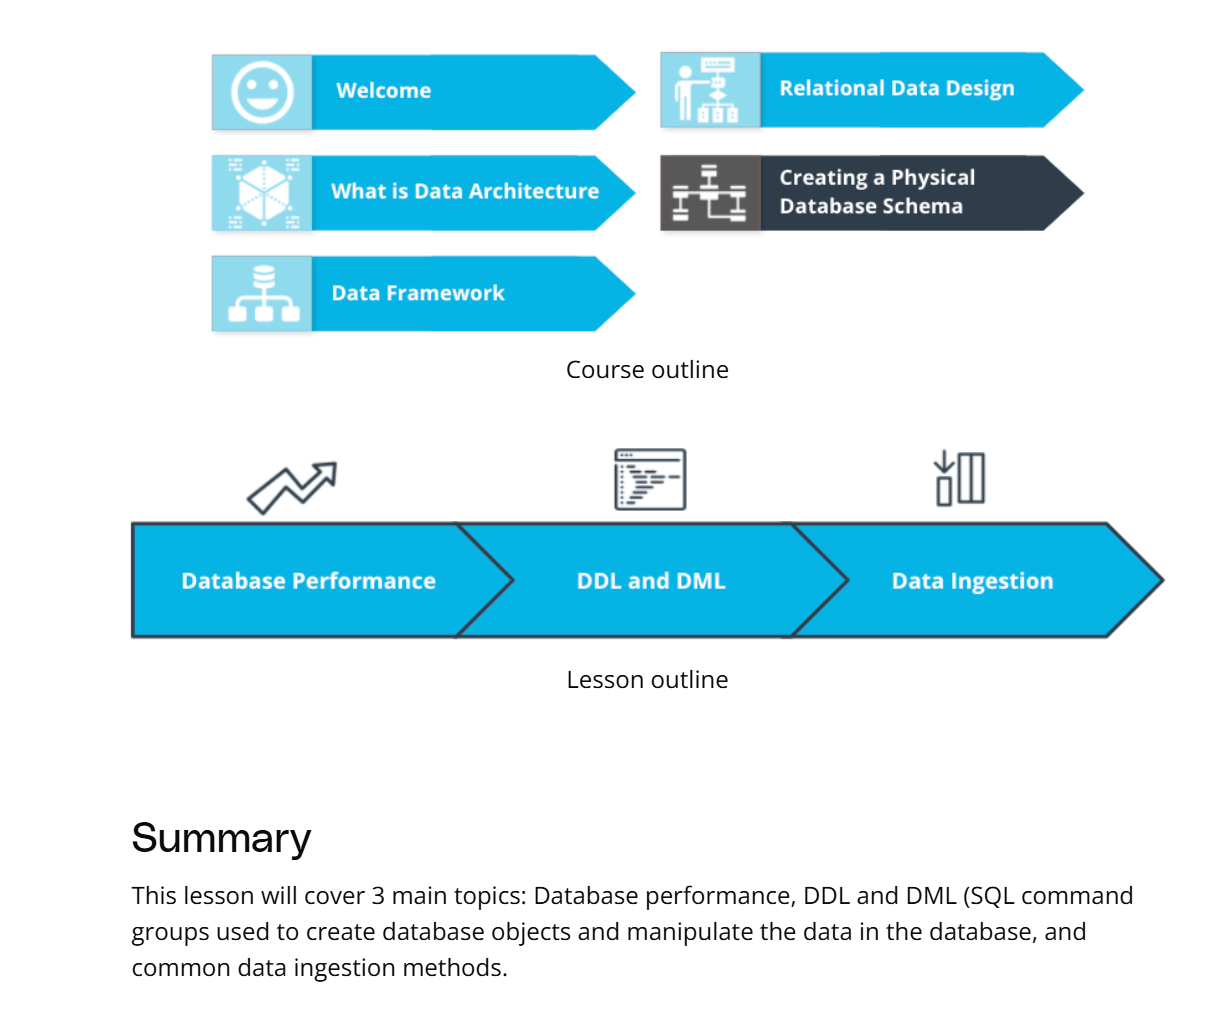

## Developing Your Intuition About Physical Databases

https://www.youtube.com/watch?v=VHrUQK-STbY

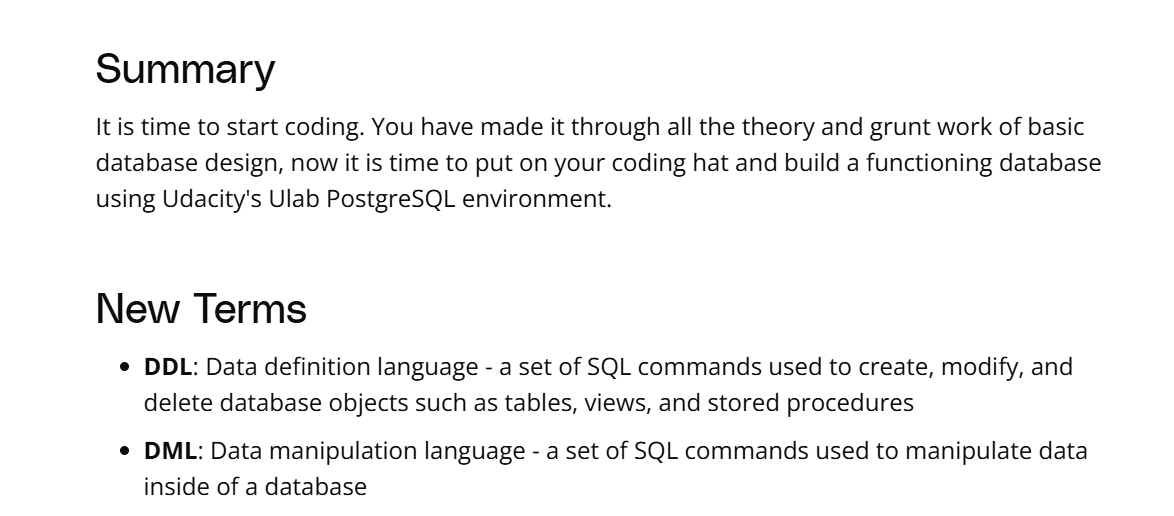

## Database Performance

### Part 1 - Performance

https://www.youtube.com/watch?v=YeGDXft-GBY

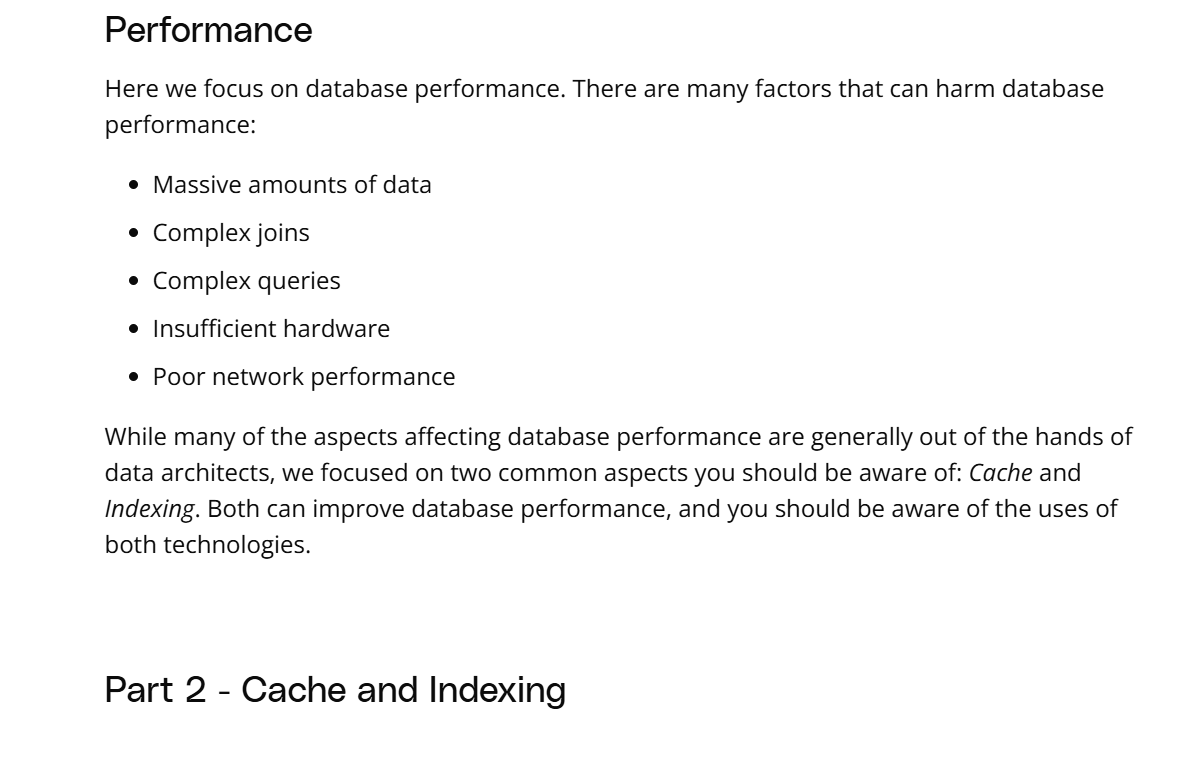

https://www.youtube.com/watch?v=tsMmrI3dTWA

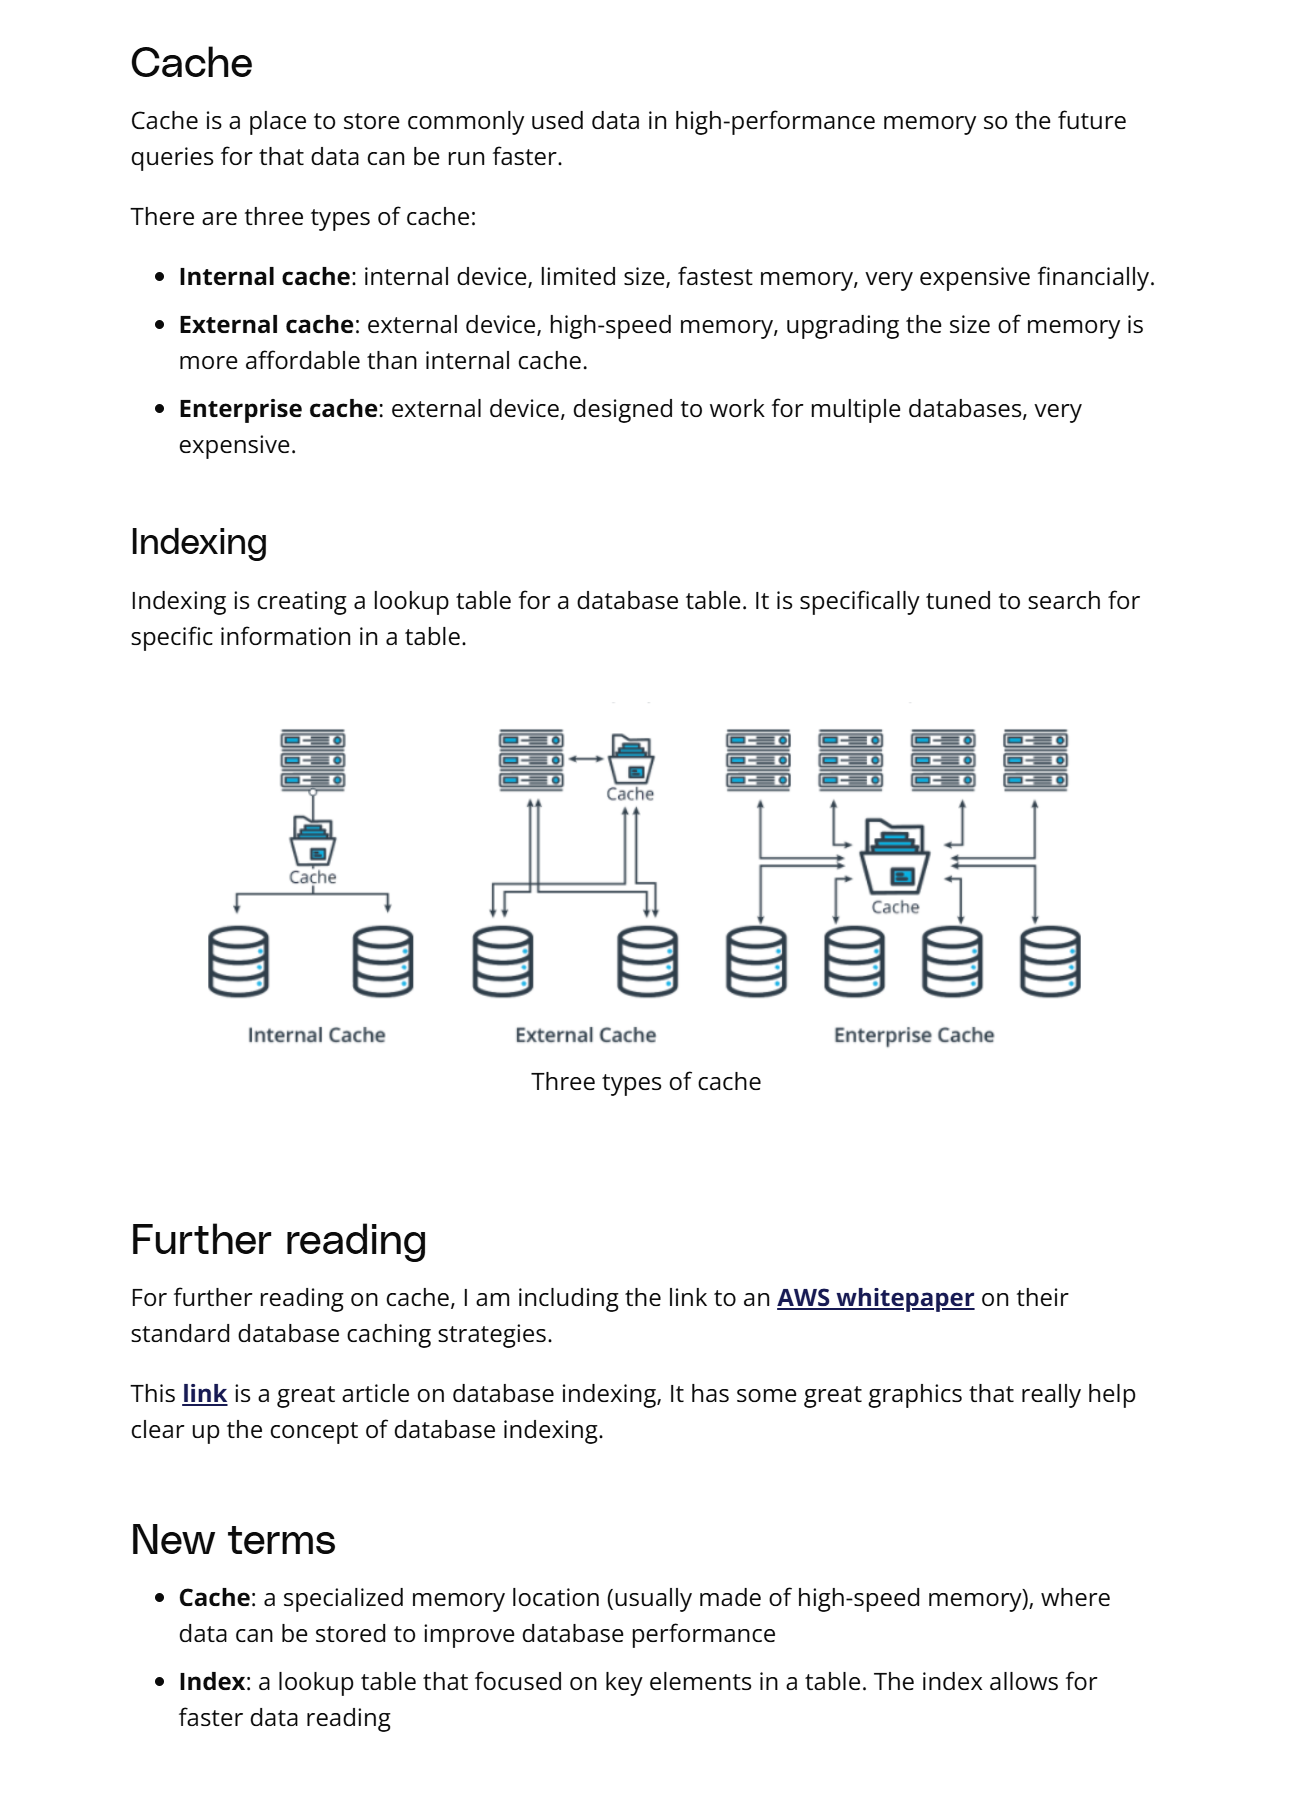

https://docs.aws.amazon.com/whitepapers/latest/database-caching-strategies-using-redis/database-caching-strategies-using-redis.pdf#welcome

https://www.geeksforgeeks.org/indexing-in-databases-set-1/

## Database Performance Quizzes

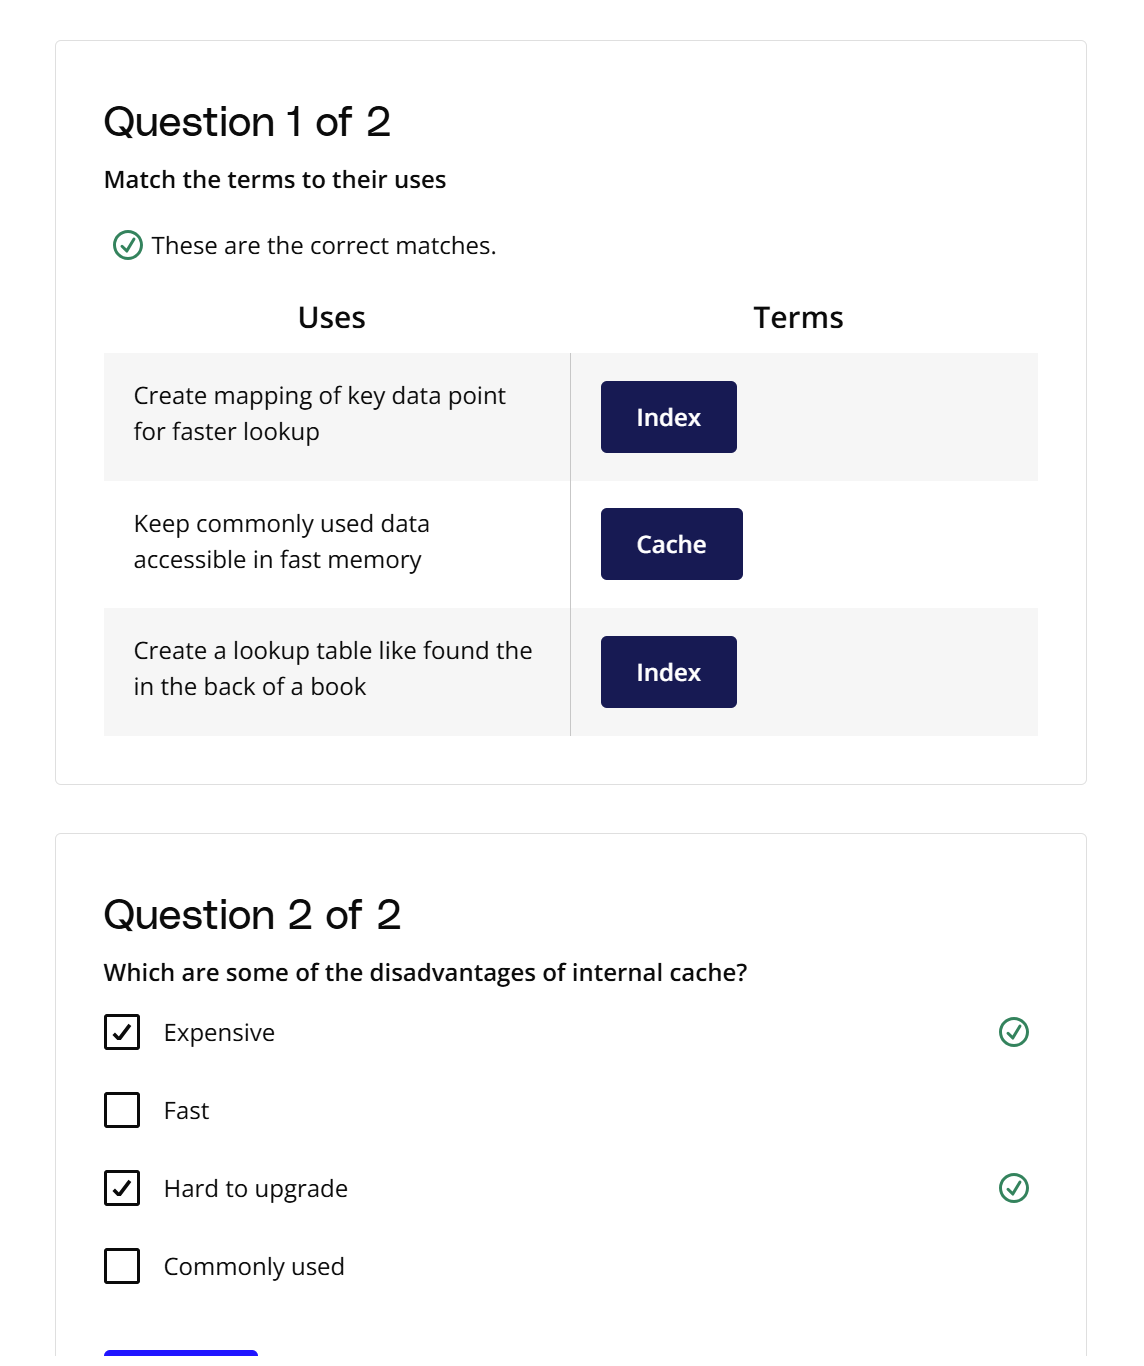

## Storage and File Systems

https://www.youtube.com/watch?v=U43hOZmeEoA

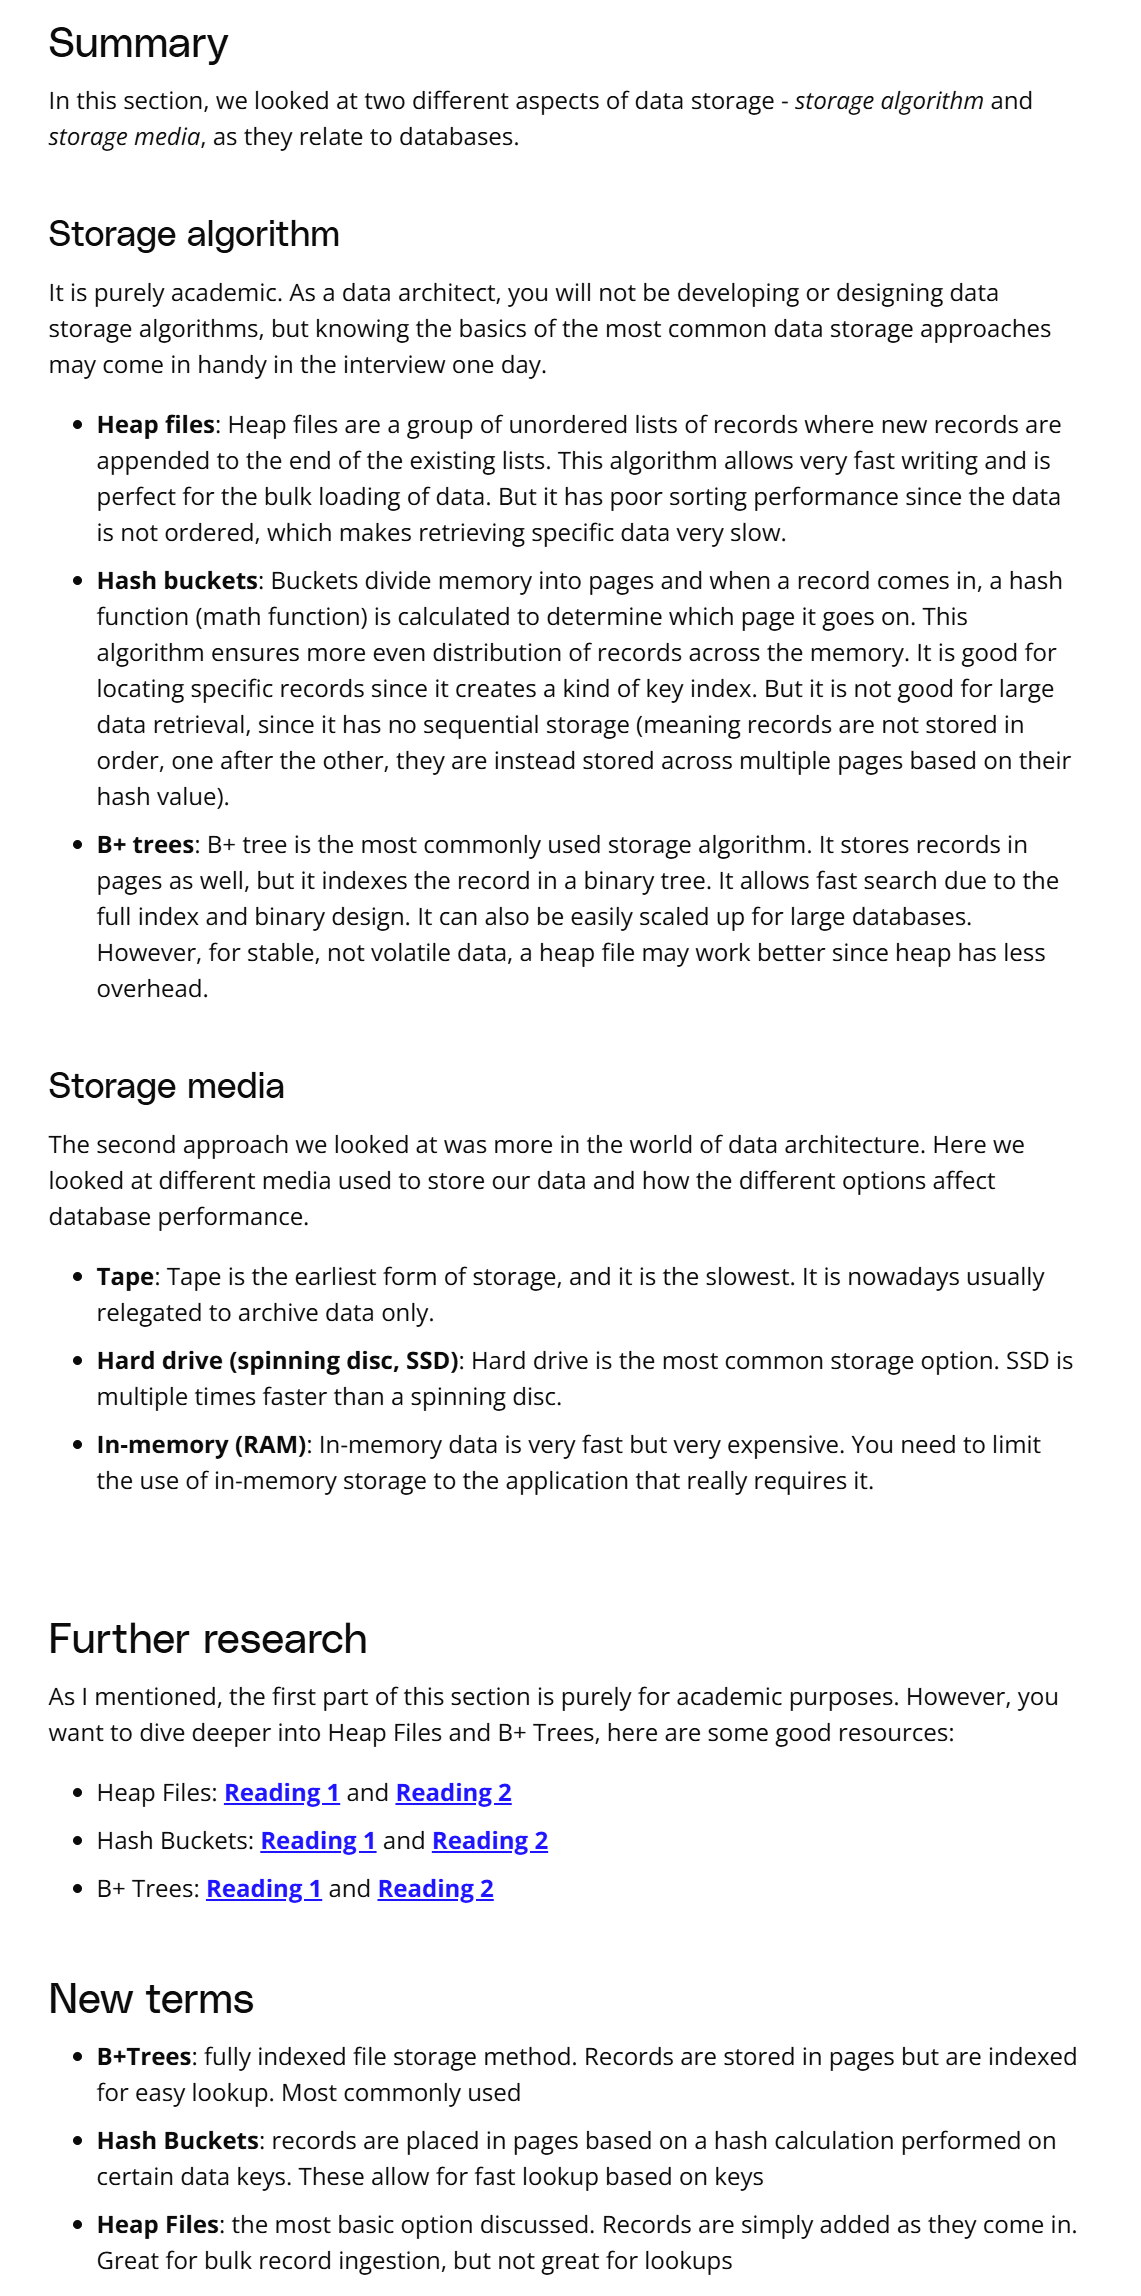

http://pages.cs.wisc.edu/~dbbook/openAccess/Minibase/spaceMgr/heap_file.html

https://www.geeksforgeeks.org/file-organization-in-dbms-set-1/

https://www.tutorialspoint.com/dbms/dbms_hashing.htm

https://www.youtube.com/watch?v=MfhjkfocRR0

https://www.geeksforgeeks.org/introduction-of-b-tree/

https://www.guru99.com/introduction-b-plus-tree.html

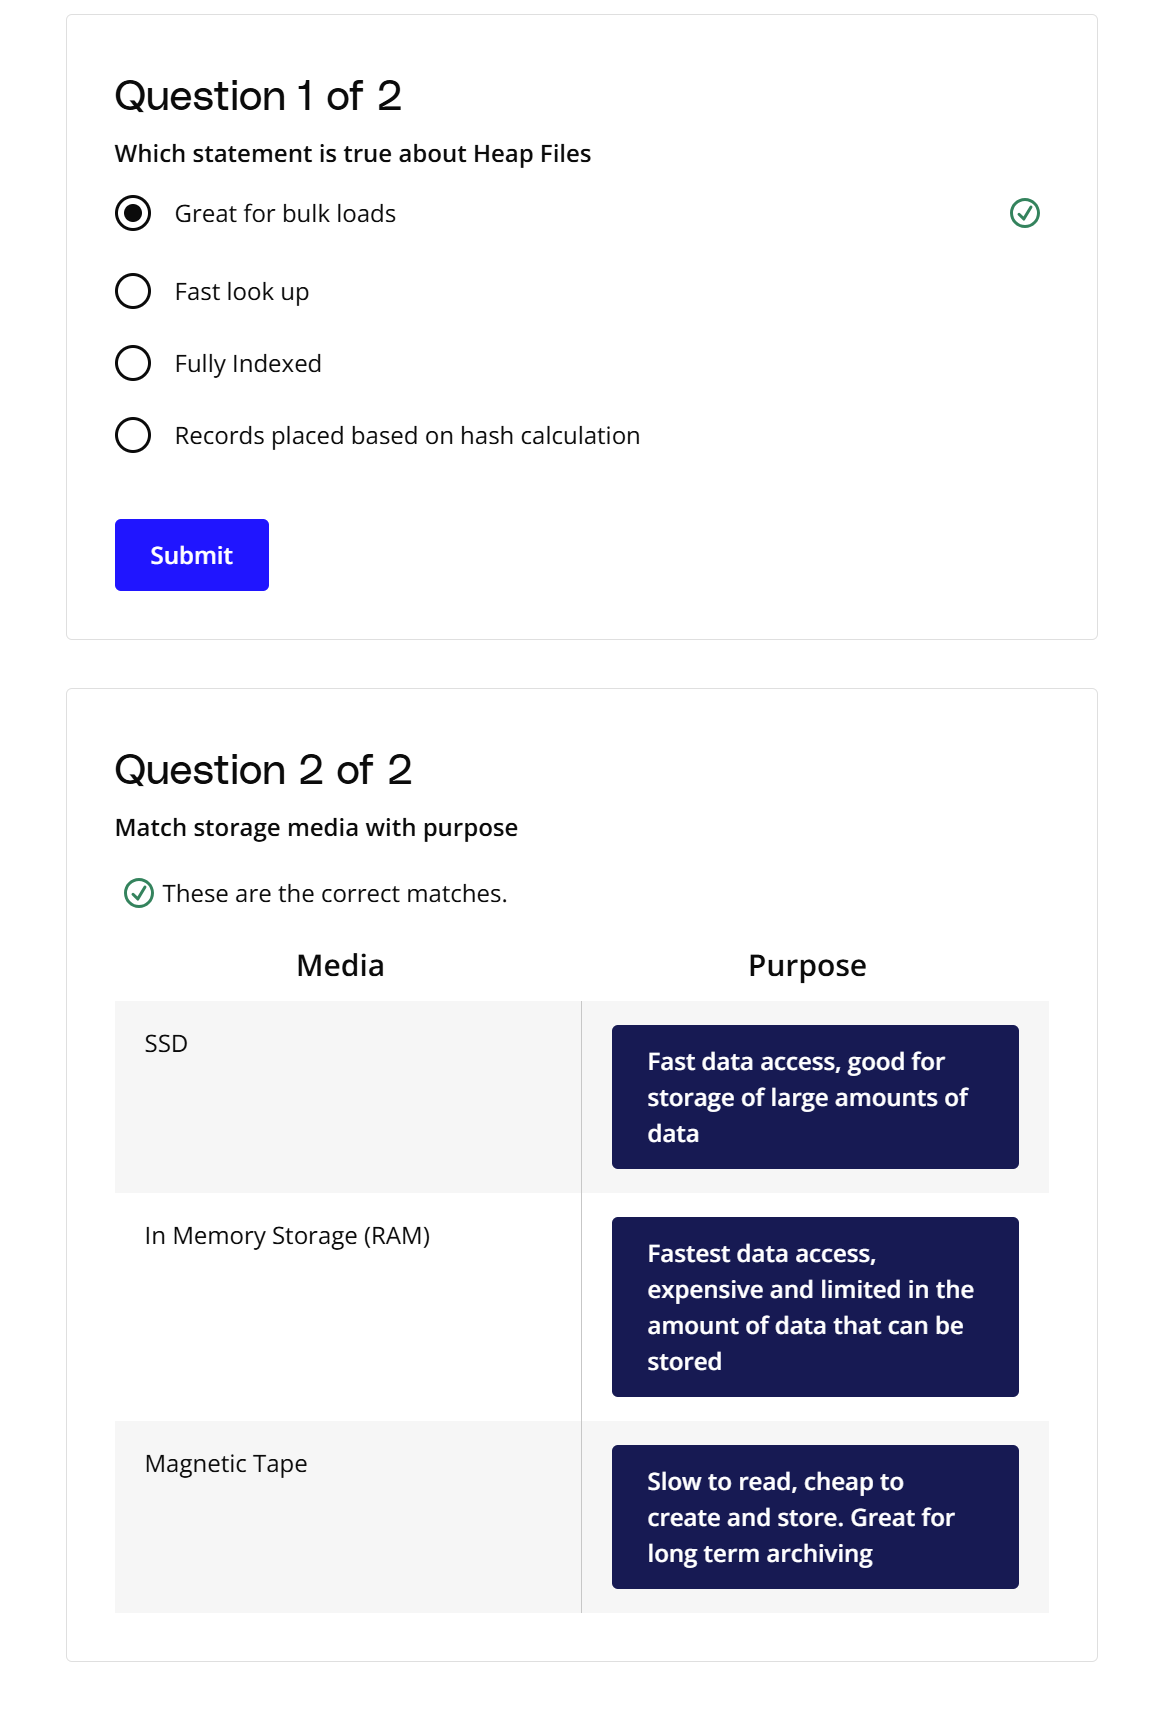

## Use DDL to Create A Database

https://www.youtube.com/watch?v=JTXDwOm8NMQ

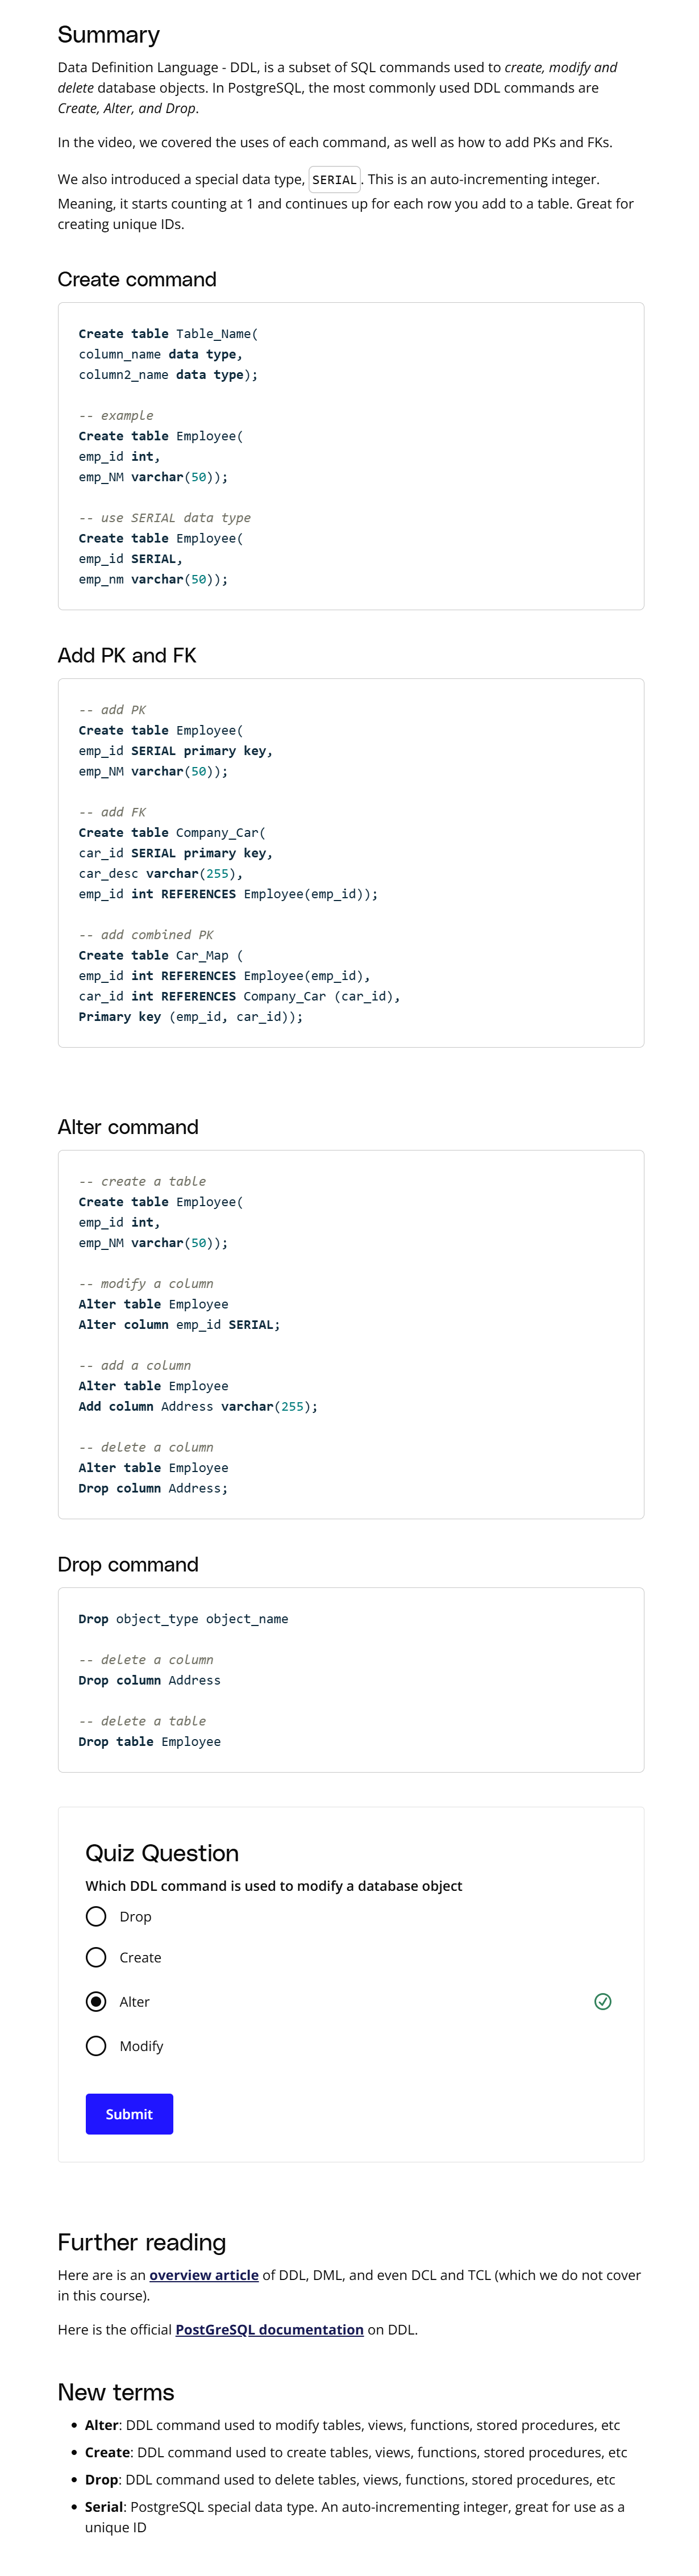

https://www.tutorialgateway.org/sql-dml-ddl-dcl-and-tcl-commands/

https://www.postgresql.org/docs/8.4/ddl.html

## Use DDL to Create A Database Walkthrough

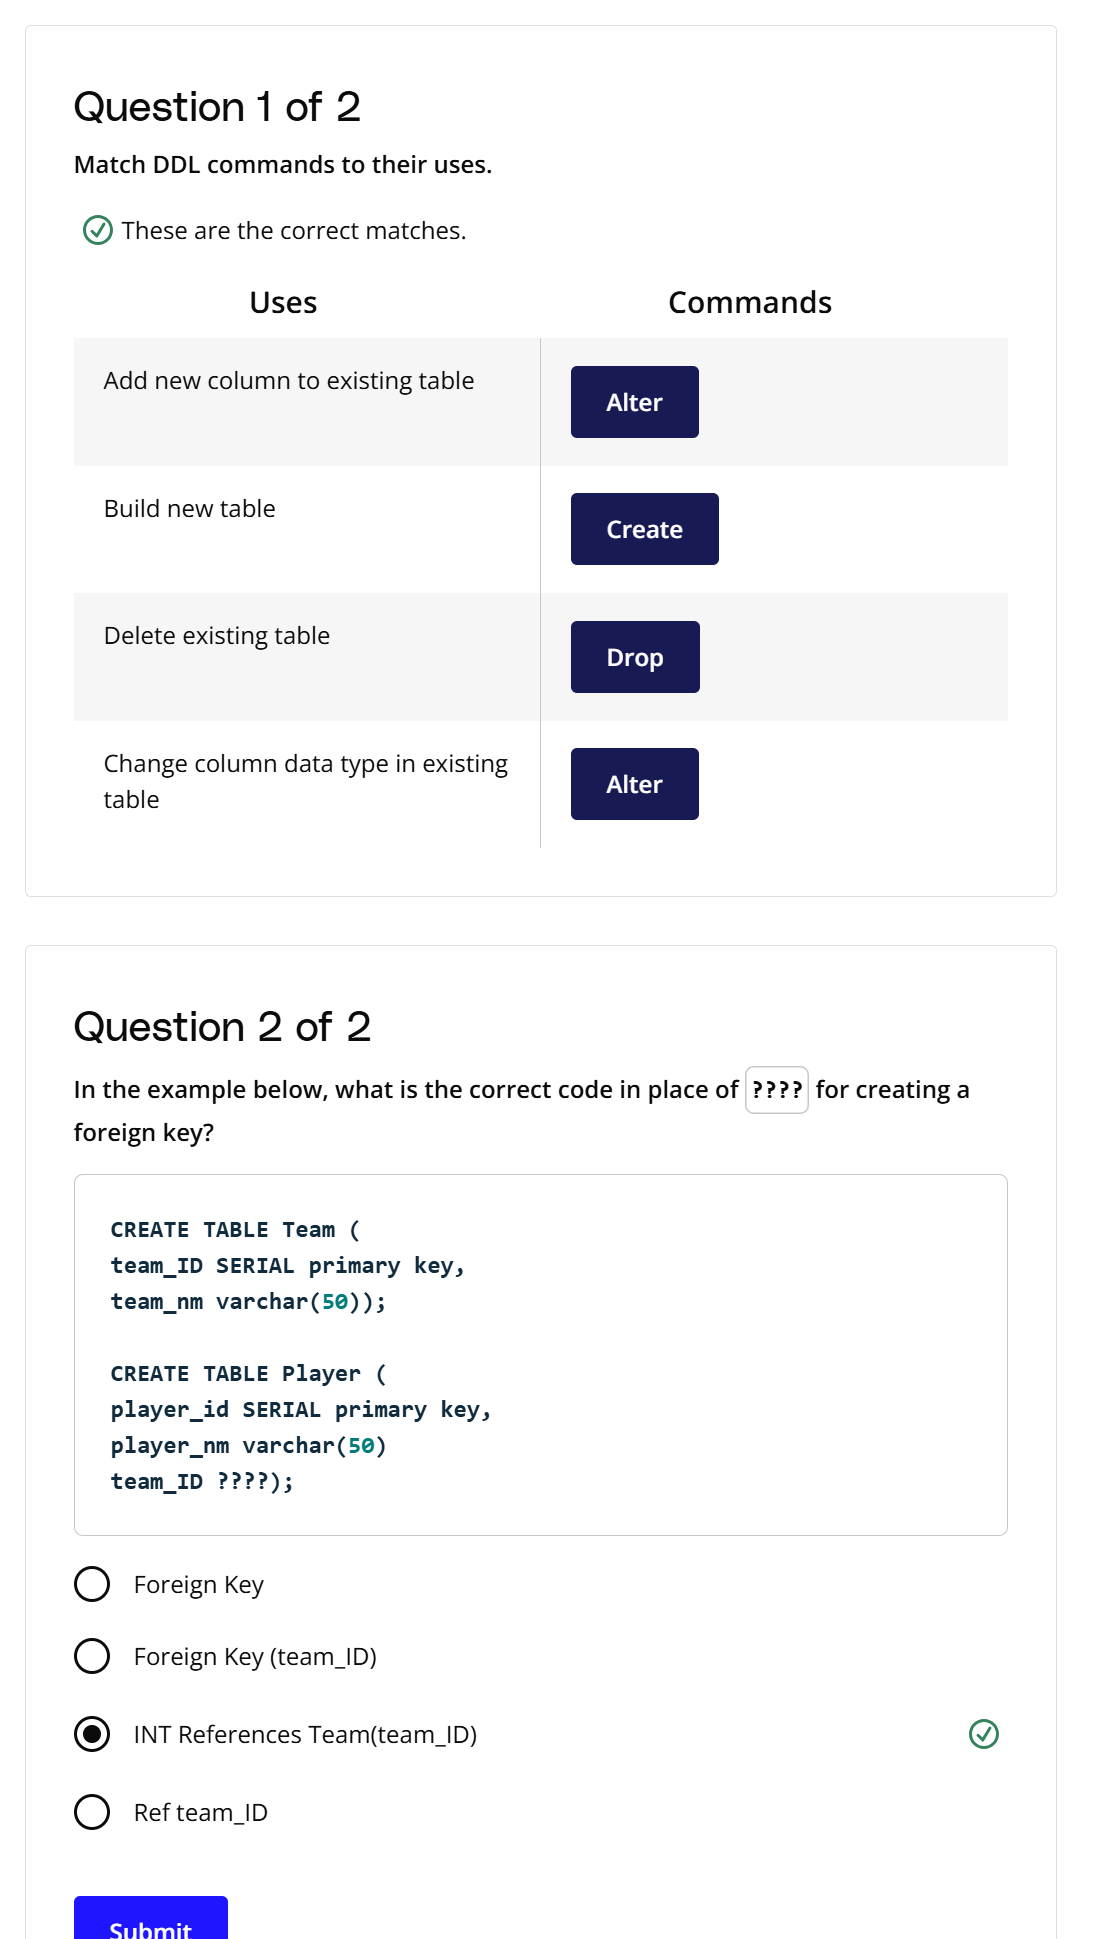

## Exercise: Use DDL to Create a Database

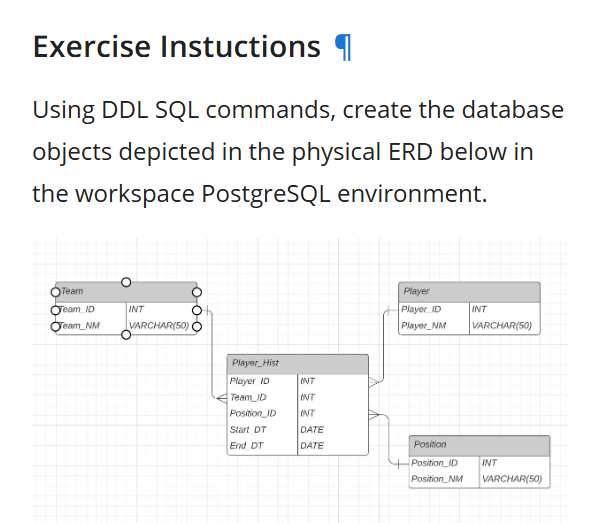

## Solution: Use DDL to Create A Database

https://www.youtube.com/watch?v=OAcQhPyUTdM

DDL Table creation code:


CREATE TABLE Player (
player_id SERIAL primary key,
player_nm varchar(50));
					  
CREATE TABLE Team (
team_id  SERIAL primary key,
team_nm varchar(50));
					  
CREATE TABLE Position (
position_id  SERIAL primary key,
position_nm varchar(50));

CREATE TABLE Player_Hist (
player_id int REFERENCES Player(player_id),
team_id int REFERENCES Team(team_id),
position_id int REFERENCES position(position_id),
start_dt date,
end_dt date,
Primary key (player_id, team_id, position_id));

Note: using SERIAL to auto-populate a unique identifier that can be used for IDs. You could have used an INT or even Varchar if you plan on populating the IDs manually. This simply saves you a step when it comes time to populate the tables with data.

## ETL, Direct Feed, Pipeline, API

https://www.youtube.com/watch?v=QBKh4UL-O8k

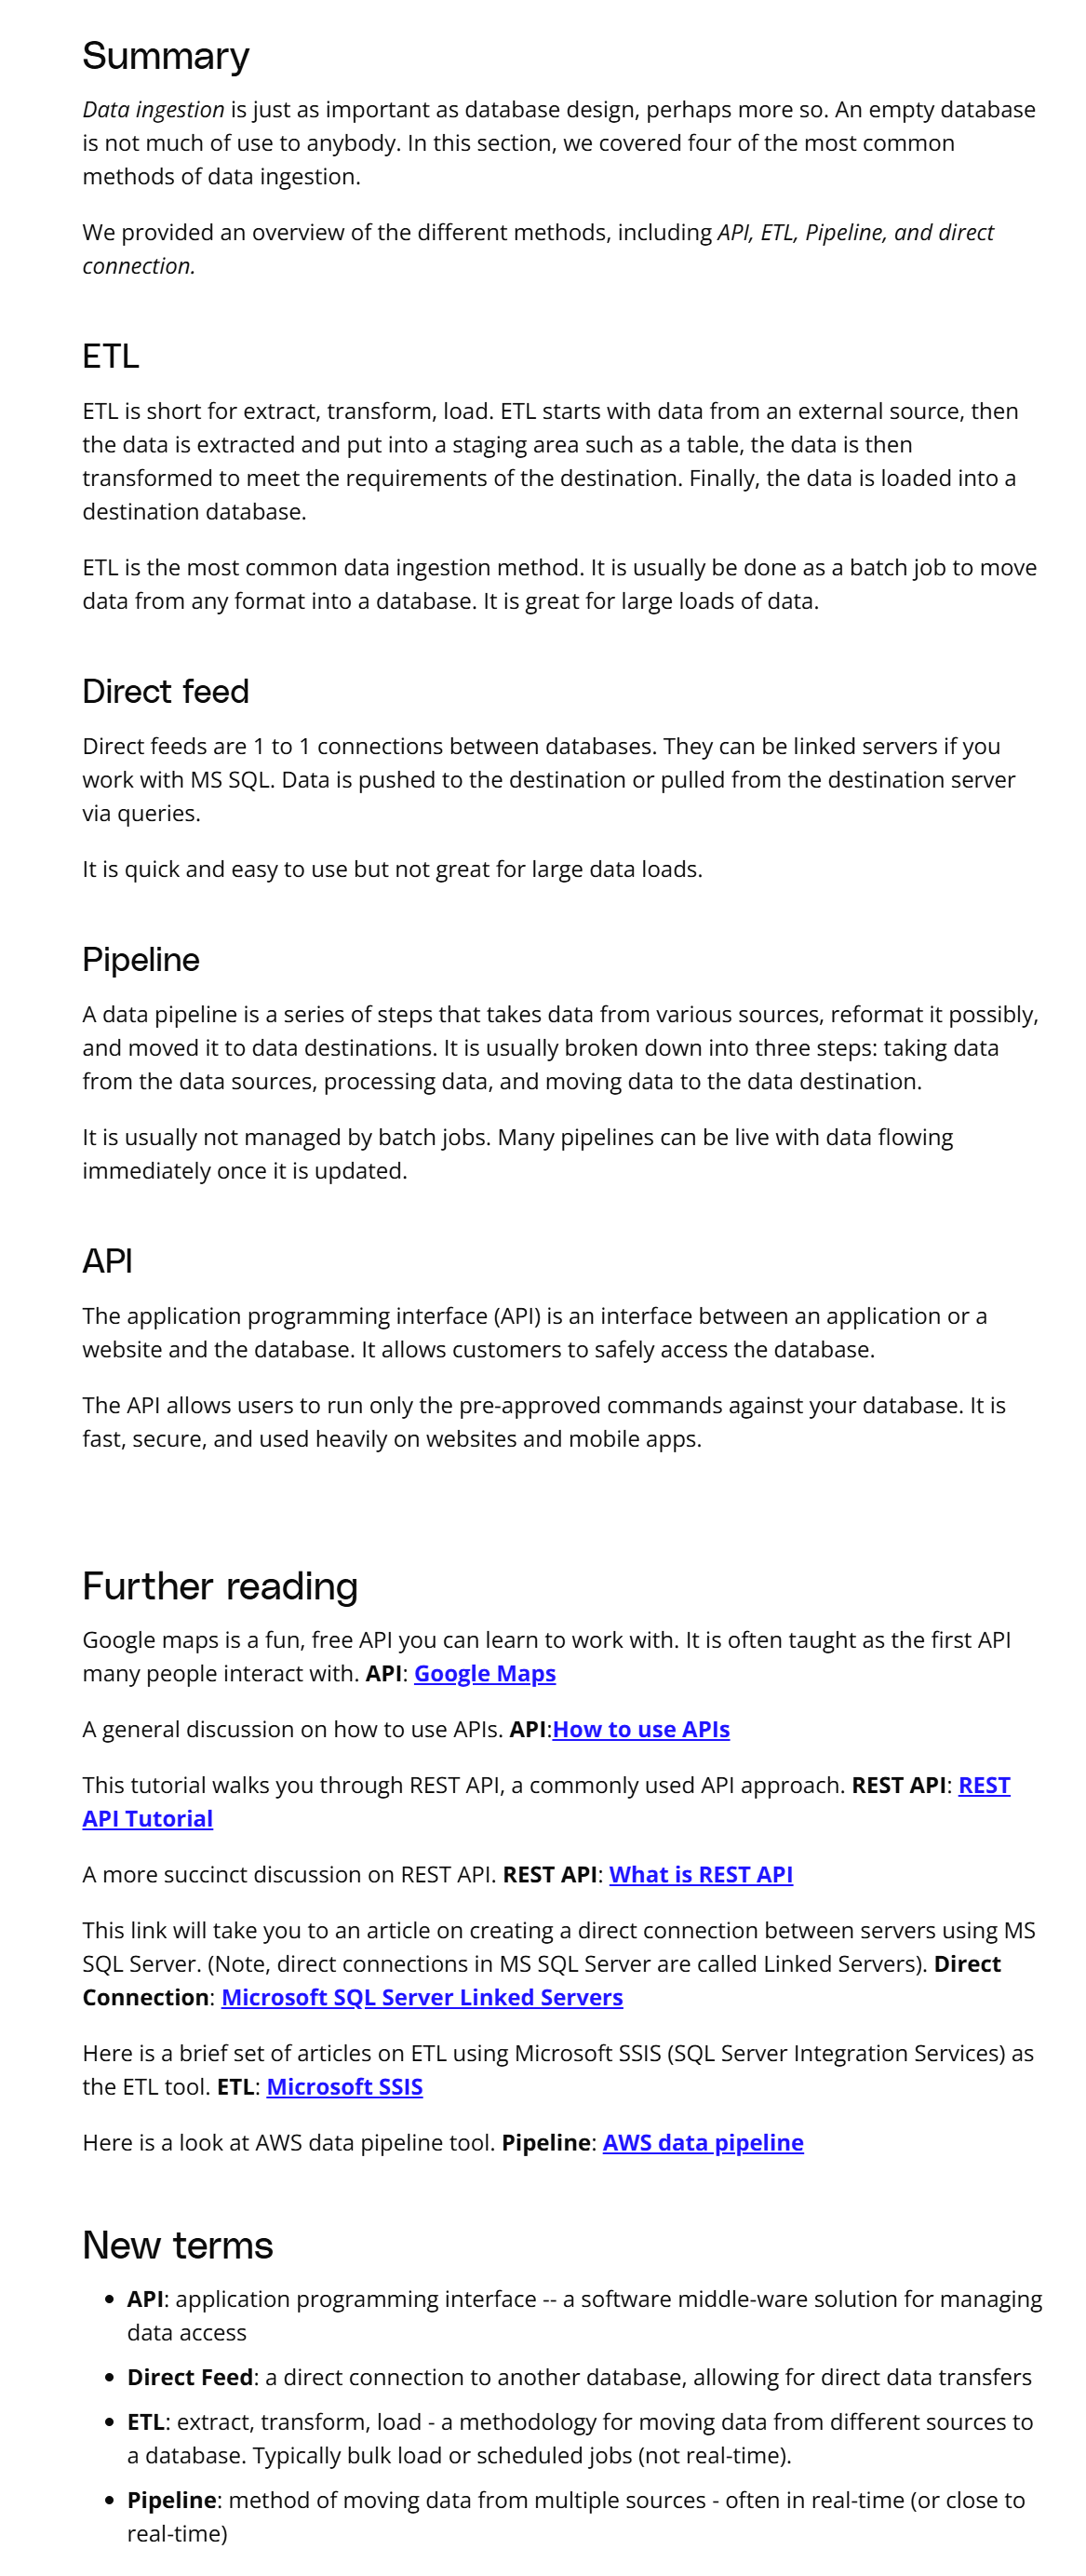

https://www.w3schools.com/graphics/google_maps_intro.asp

https://snipcart.com/blog/apis-integration-usage-benefits

https://www.restapitutorial.com/

https://restfulapi.net/

https://analytics4all.org/2018/03/30/sql-server-linked-servers

https://www.edureka.co/blog/aws-data-pipeline-tutorial/

## ETL, Direct Feed, Pipeline, API Walkthrough

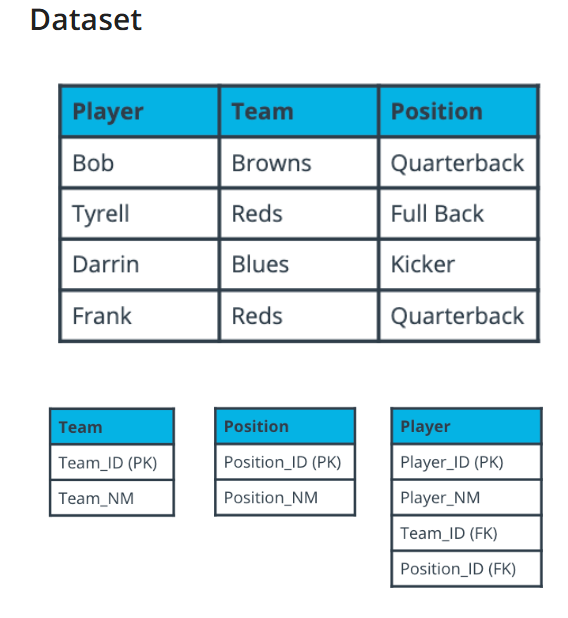

In [ ]:
-- create stage table
Create table Stg(
player varchar(50),
team varchar(50),
position varchar(50));

-- load data into stage table
Insert into Stg
Values ('Bob', 'Browns', 'Quarterback'),
('Tyrell', 'Reds', 'Full Back'),
('Darrin', 'Blues', 'Kicker'),
('Frank', 'Reds', 'Quarterback');

-- create a Team table
Create table Team (
team_id serial primary key,
team_nm varchar(50));

-- create a Position Table
Create table Position (
position_id serial primary key,
position_nm varchar(50));

-- create a Player table
Create table Player (
player_id serial primary key,
player_nm varchar(50),
team_id int references Team(team_id),
position_id int references Position(position_id));

-- load data into Team table
Insert into Team(team_nm)
Select distinct team from Stg;

--load data into Position table
Insert into Position(position_nm)
Select distinct position from Stg;

--insert into Player table
Insert into Player(player_nm, team_id, position_id)
Select s.player, t.team_id, p.position_id
From stg as s
Join team as t 
On s.team = t.team_nm
Join position as p 
On s.position = p.position_nm;

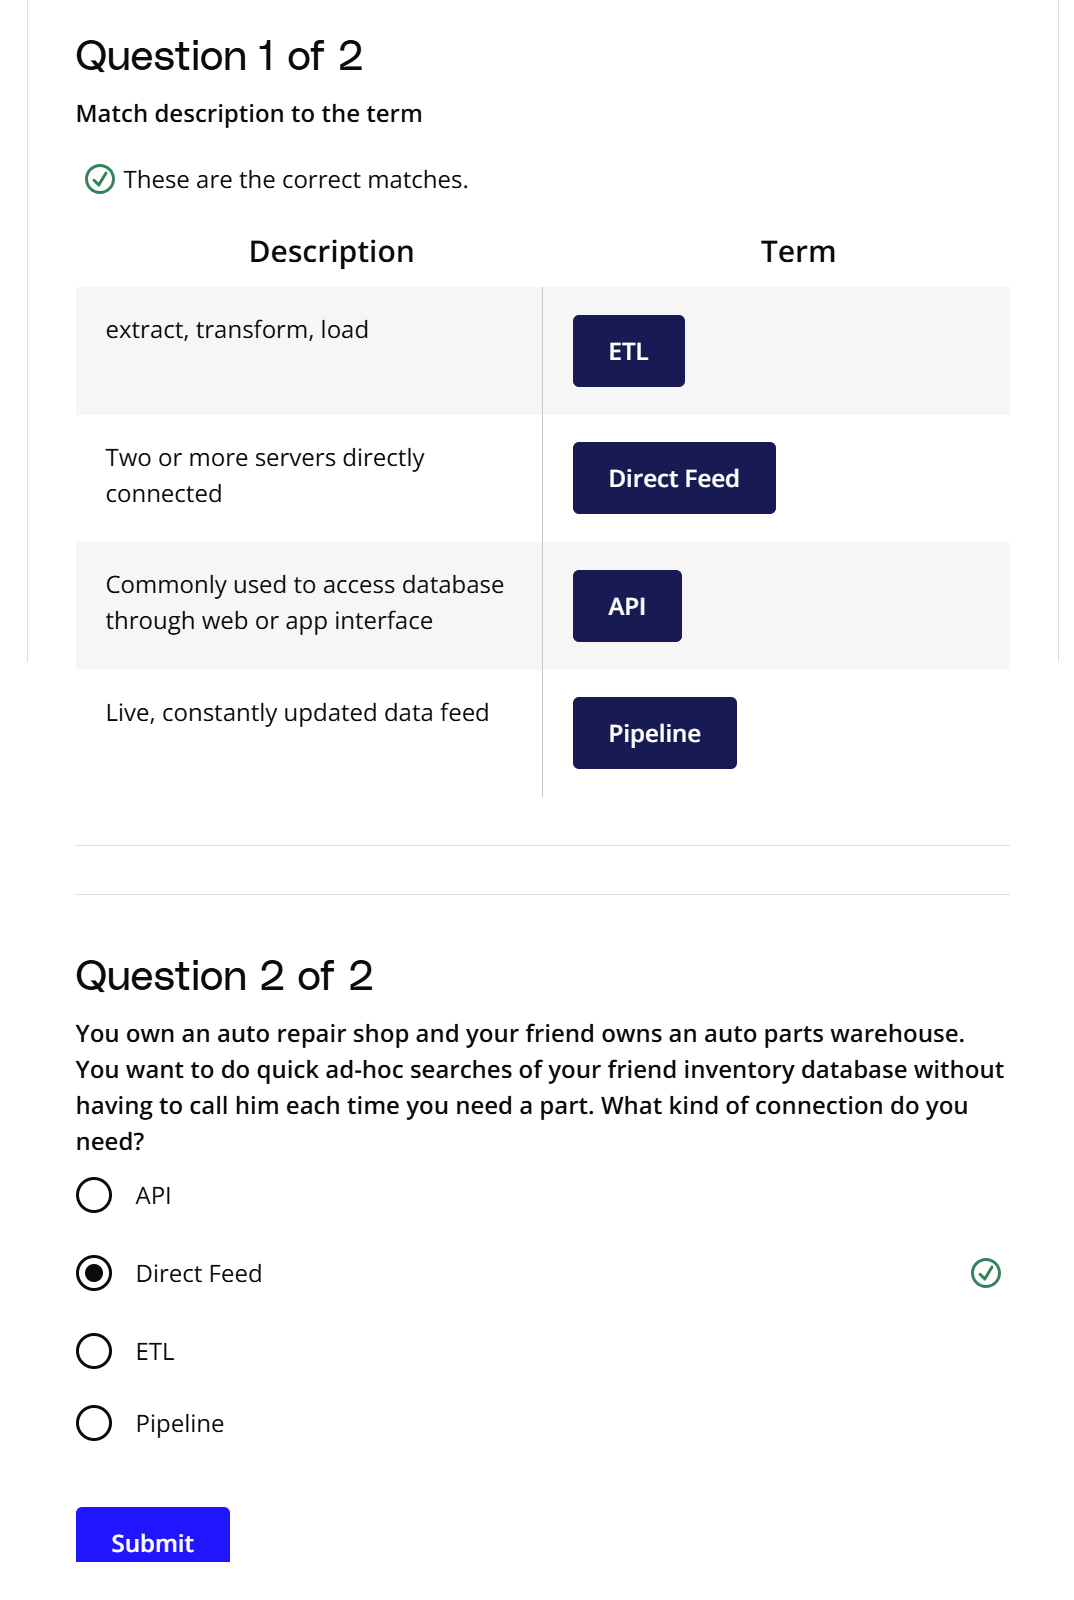

## Exercise: ETL, Direct Feed, Pipeline, API

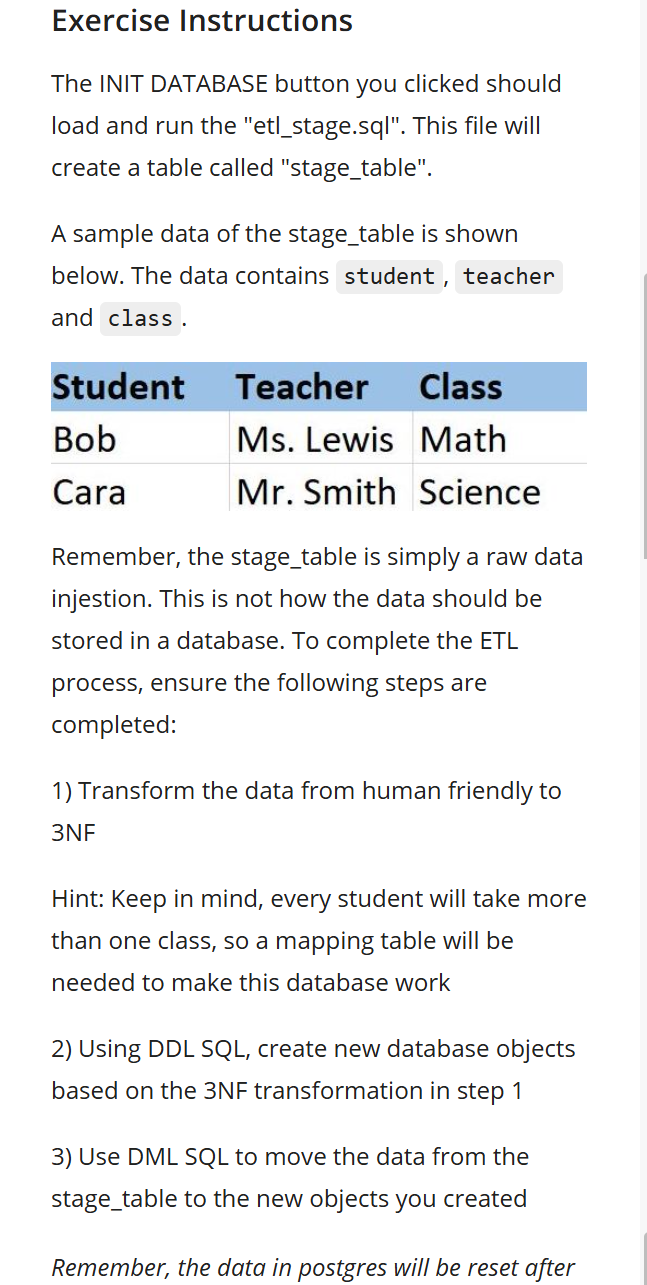

## Solution: ETL, Direct Feed, Pipeline, API

https://www.youtube.com/watch?v=z41h3eU4DMA

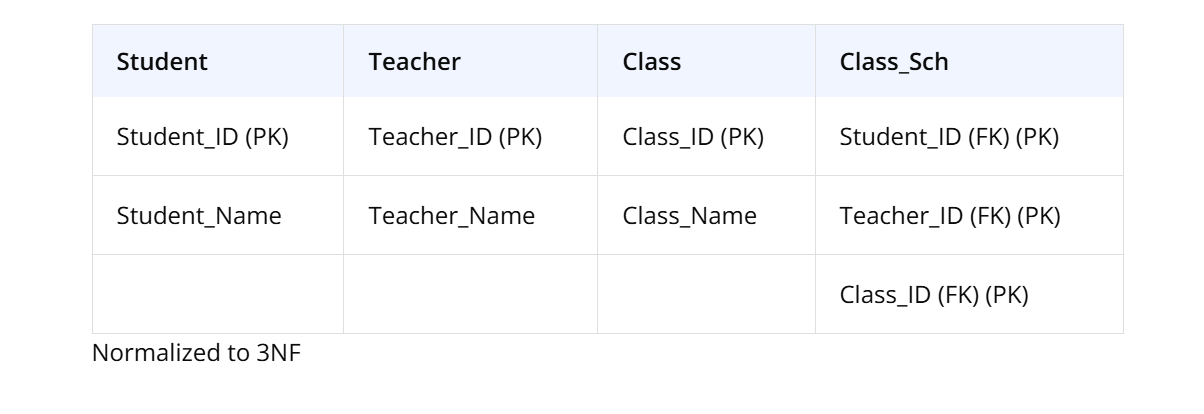

## ETL Table Creation:

In [ ]:
CREATE TABLE Student (
student_id SERIAL primary key,
student_name varchar(50));
					  
CREATE TABLE Teacher (
teacher_id  SERIAL primary key,
teacher_name varchar(50));
					  
CREATE TABLE Class (
class_id  SERIAL primary key,
class_name varchar(50));

CREATE TABLE Class_Sch (
student_id int REFERENCES Student(student_id),
teacher_id int REFERENCES Teacher(teacher_id),
class_id int REFERENCES Class(class_id),
primary key (student_id, teacher_id, class_id));
ETL - Populate tables from stage_table
INSERT INTO Student (student_name)
SELECT DISTINCT(student) FROM stage_table;

INSERT INTO Teacher(teacher_name)
SELECT DISTINCT(teacher) FROM stage_table;

INSERT INTO Class (class_name)
SELECT DISTINCT(class) FROM stage_table;

INSERT INTO Class_Sch (student_id, teacher_id, class_id)
SELECT st.student_id, t.teacher_id, c.class_id
FROM stage_table AS s
JOIN Student AS st
ON s.student = st.student_name
JOIN Teacher AS t
ON s.teacher = t.teacher_name
JOIN Class AS c
ON s.class = c.class_name;

## CRUD

https://www.youtube.com/watch?v=ibPVcHW8EI0

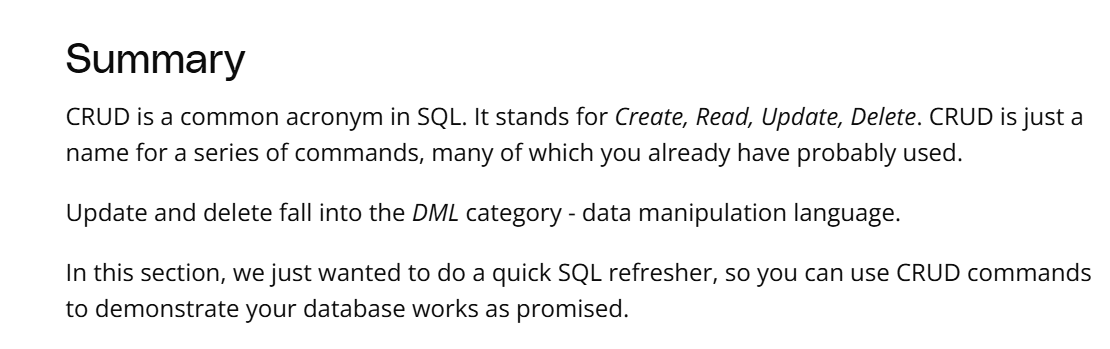

## Create

In [ ]:
Create object_type object-name 
(parameters);

-- example
Create table Test (
Column_a int,
Column_b varchar(50));

## Read

In [ ]:
-- select all
Select *
From Test;

-- select column
Select Column_A
From Test;

-- limit result
Select *
From Test
Where Column_B = ‘Hello’

## Update

-- insert, add data to a table
Insert into Test (Column_A, Column_B)
Values (1, ‘Hello’),
(2, ‘Good-bye’);

-- update, change existing values in a table
Update Test 
Set Column_B = ‘Bonjour’
Where Column_A = 1;

## Delete

-- delete individual records
Delete from Test
Where Column_A = 1;

-- delete everything from the table
Truncate table Test;

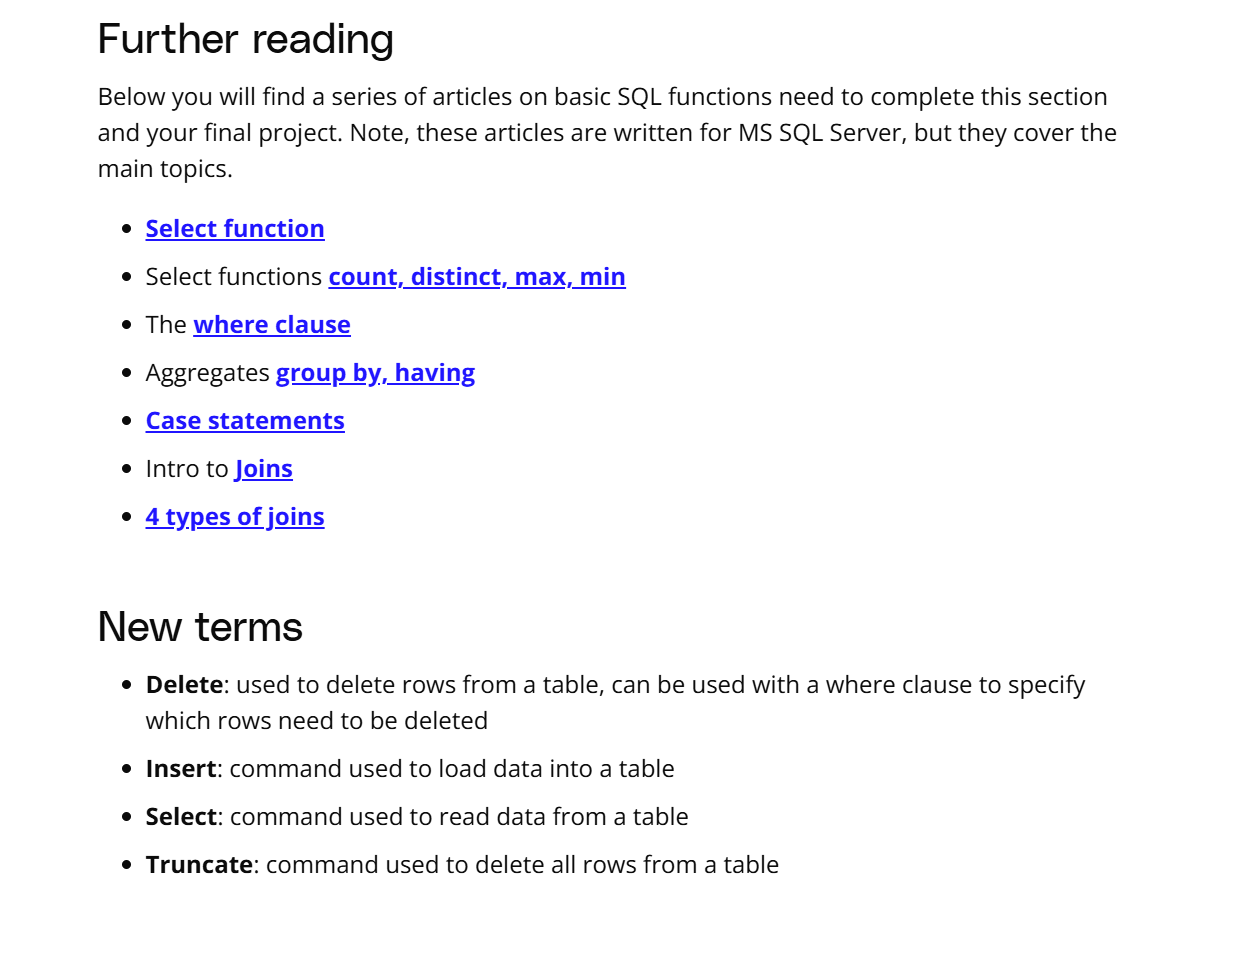

## CRUD Walkthrough

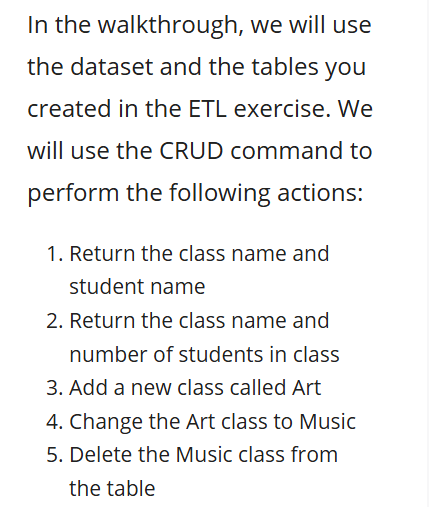

In [ ]:
-- Create tables/entities
CREATE TABLE Student(
student_id SERIAL primary key,
student_name varchar(50));

CREATE TABLE Teacher (
teacher_id  SERIAL primary key,
teacher_name varchar(50));

CREATE TABLE Class (
class_id  SERIAL primary key,
class_name varchar(50));

CREATE TABLE Class_Sch (
student_id int REFERENCES Student(student_id),
teacher_id int REFERENCES Teacher(teacher_id),
class_id int REFERENCES Class(class_id),
primary key (student_id, teacher_id, class_id));

-- Ingest data into the tables
INSERT INTO Student (student_name)
SELECT DISTINCT(student) FROM stage_table;

INSERT INTO Teacher(teacher_name)
SELECT DISTINCT(teacher) FROM stage_table;

INSERT INTO Class (class_name)
SELECT DISTINCT(class) FROM stage_table;

INSERT INTO Class_Sch (student_id, teacher_id, class_id)
SELECT st.student_id, t.teacher_id, c.class_id
FROM stage_table AS s
JOIN Student AS st
ON s.student = st.student_name
JOIN Teacher AS t
ON s.teacher = t.teacher_name
JOIN Class AS c
ON s.class = c.class_name;

-- view class_sch table
SELECT * 
FROM class_sch;

--return class name and student name
SELECT c.class_name, s.student_name
FROM class_sch AS cs
JOIN class AS c
ON c.class_id = cs.class_ID
JOIN student AS s
ON s.student_id = cs.student_id;

-- return class name and number of students in class
SELECT c.class_name , COUNT(s.student_name) AS num_students
FROM class_sch AS cs
JOIN class AS c
ON c.class_id = cs.class_ID
JOIN student AS s
ON s.student_id = cs.student_id
GROUP BY c.class_name;

-- return class list
SELECT *
FROM class;

-- add art to class table
INSERT INTO class(class_name)
VALUES ('Art');

-- view table again to see change
SELECT *
FROM class;

-- change art to music
UPDATE class
SET class_name = 'Music'
WHERE class_name= 'Art';

-- view table again to see change
SELECT *
FROM class;

-- delete music from class table
DELETE FROM class
WHERE class_name = 'Music';

-- view table to see changes
SELECT *
FROM class;

## CRUD Quizzes

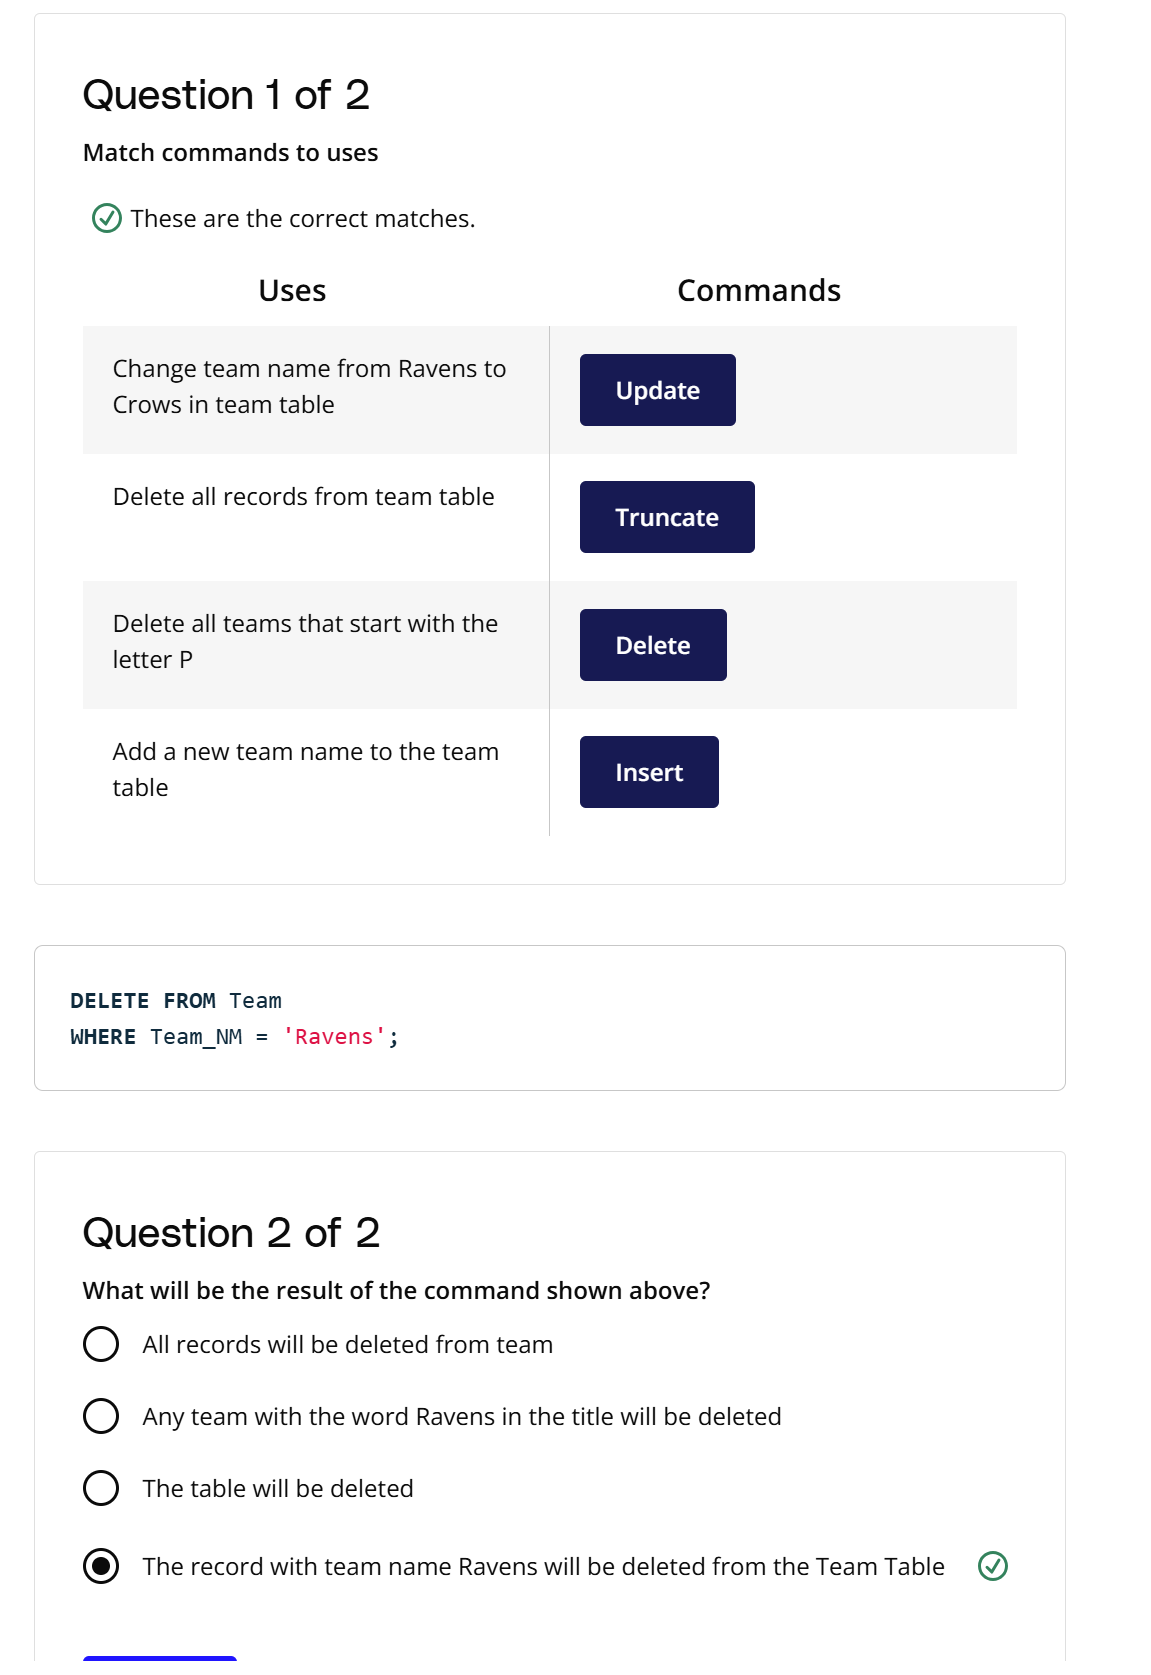

## Exercise: CRUD

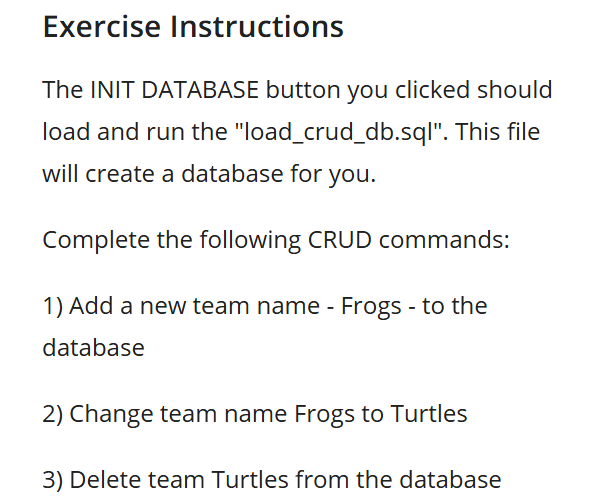

INSERT INTO Team(team_name)
VALUES ('Frogs');

UPDATE Team
SET team_name = 'Turtle'
WHERE team_name = 'Frogs';

DELETE FROM Team
WHERE team_name = 'Turtle';

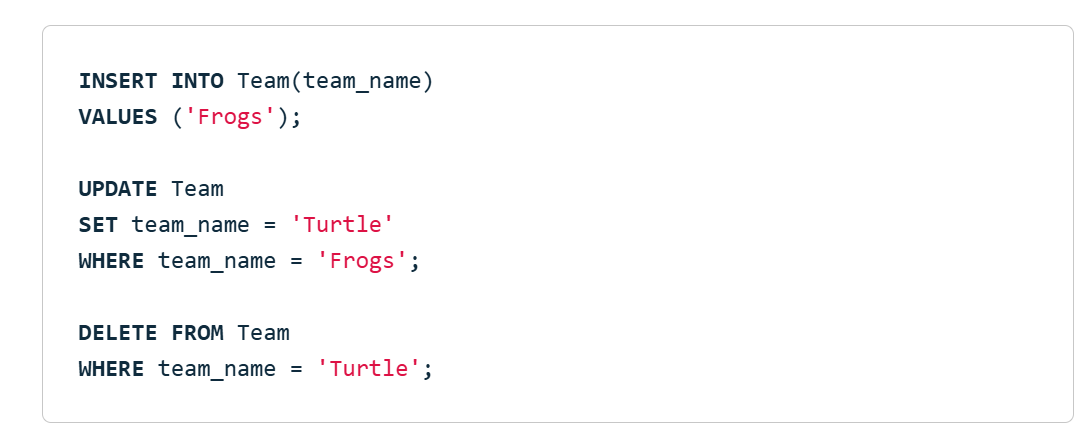

## Edge Case: Data Types

https://www.youtube.com/watch?v=X3xvpQ-e45U

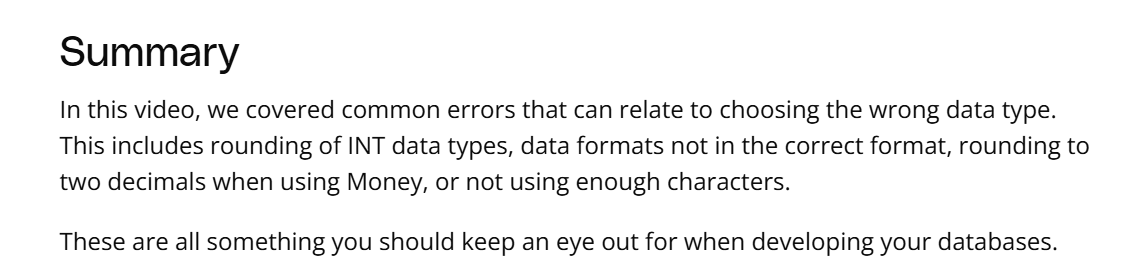

## Final Exercise